In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("Data_Visualization.csv")
df.head()


,Segment_ID,Surface_Type,Region,Traffic_Volume,Pavement_Thickness_mm,IRI_m_per_km,PCI,Maintenance_Cost_USD
0,S001,Asphalt,East,18045,195.2,3.66,80.6,4971
1,S002,Concrete,West,13978,172.9,3.40,91.0,26491
2,S003,Gravel,West,10694,196.3,2.55,79.7,7426
3,S004,Asphalt,West,4803,136.1,3.39,86.2,12629
4,S005,Asphalt,South,17713,157.1,3.30,74.7,19324


🧩 1. Pie Chart — Pavement Surface Type Composition

Question:
What is the percentage distribution of road surface types (Asphalt, Concrete, Gravel) across the pavement network?

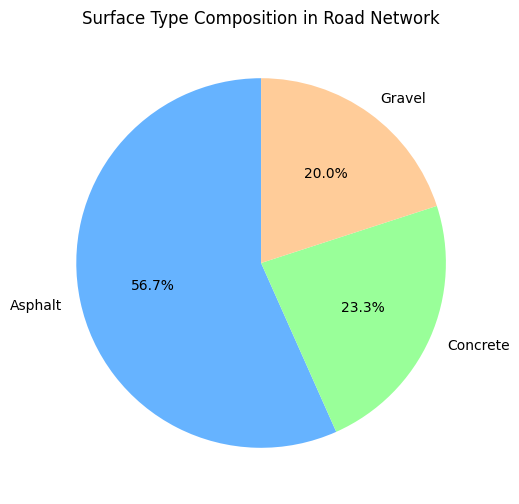

In [3]:
surface_counts = df['Surface_Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(surface_counts, labels=surface_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title("Surface Type Composition in Road Network")
plt.show()

Answer Interpretation:

The pie chart reveals which material dominates the network.

If asphalt > 60%, it shows the network mainly uses flexible pavements, which may require more frequent maintenance.

🧩 2. Bar Chart — Average Pavement Condition by Region

Question:
Compare the average Pavement Condition Index (PCI) across different regions.

/tmp/ipython-input-166414047.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Region', y='PCI', data=df, estimator='mean', ci='sd', palette='Blues_d')
/tmp/ipython-input-166414047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='PCI', data=df, estimator='mean', ci='sd', palette='Blues_d')


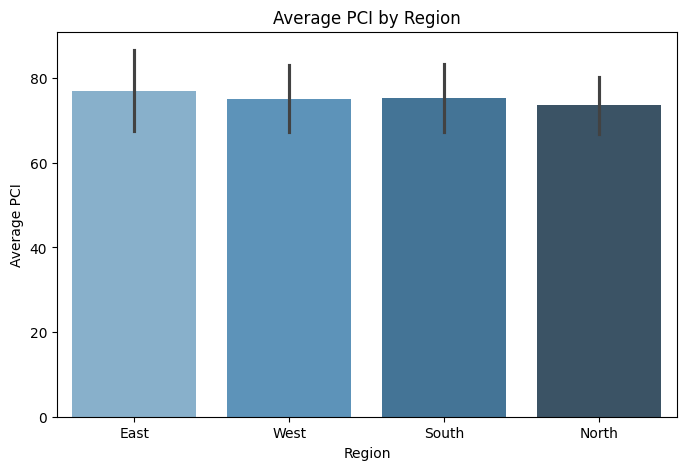

In [4]:
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='PCI', data=df, estimator='mean', ci='sd', palette='Blues_d')
plt.title("Average PCI by Region")
plt.ylabel("Average PCI")
plt.show()


Answer Interpretation:

The bar chart highlights regional disparities.

Regions with lower PCI may have harsher climates or higher loads → need priority maintenance.

🧩 3. Histogram — Pavement Roughness (IRI) Distribution

Question:
Visualize how surface roughness (IRI) values are distributed across all segments.

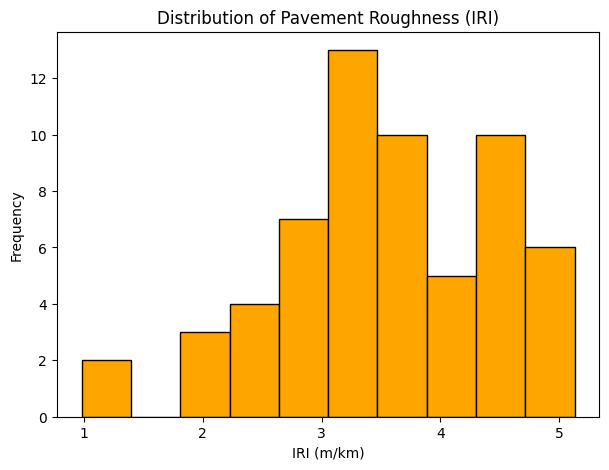

skewness: -0.529269413371682


In [8]:
from scipy import stats
plt.figure(figsize=(7,5))
plt.hist(df['IRI_m_per_km'], bins=10, color='orange', edgecolor='black')
plt.title("Distribution of Pavement Roughness (IRI)")
plt.xlabel("IRI (m/km)")
plt.ylabel("Frequency")
plt.show()
print('skewness:', stats.skew(df['IRI_m_per_km']))


Answer Interpretation:

A left-skewed histogram means many roads are smooth, but a few are very smooth (potential well-maintained zones).

🧩 4. Cumulative Histogram — Smoothness Compliance

Question:
Show cumulative frequency of pavement roughness to estimate what proportion of roads have IRI below 3.5 m/km.

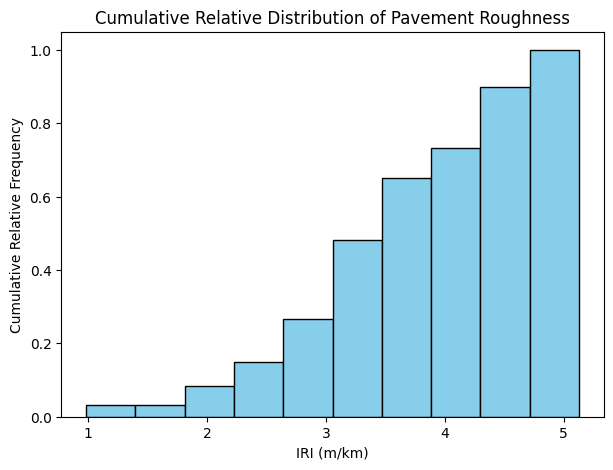

In [12]:
import numpy as np
plt.figure(figsize=(7,5))
plt.hist(df['IRI_m_per_km'], bins=10, cumulative=True, color='skyblue', edgecolor='black', weights=np.ones_like(df['IRI_m_per_km']) / len(df['IRI_m_per_km']))
plt.title("Cumulative Relative Distribution of Pavement Roughness")
plt.xlabel("IRI (m/km)")
plt.ylabel("Cumulative Relative Frequency")
plt.show()

Answer Interpretation:

If ~70% of roads have IRI < 3.5, network ride quality is acceptable; otherwise, maintenance backlog may exist.

🧩 5. Scatter Plot — Traffic vs Roughness

Question:
Investigate the relationship between traffic volume and roughness (IRI).

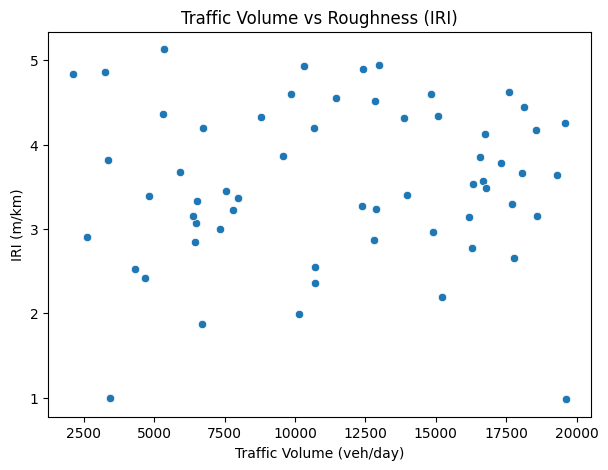

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Traffic_Volume', y='IRI_m_per_km', data=df)
plt.title("Traffic Volume vs Roughness (IRI)")
plt.xlabel("Traffic Volume (veh/day)")
plt.ylabel("IRI (m/km)")
plt.show()


Answer Interpretation:

A positive trend suggests higher traffic causes more surface roughness → deterioration due to loading.

🧩 6. Scatter Plot with Three Features (Bubble Plot)

Question:
Examine how maintenance cost varies with traffic and PCI, while bubble size indicates pavement thickness.

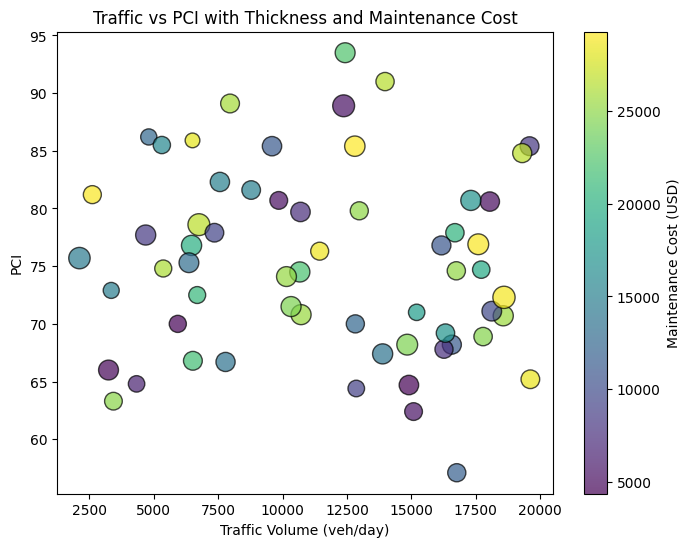

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df['Traffic_Volume'], df['PCI'],
            s=df['Pavement_Thickness_mm'],
            c=df['Maintenance_Cost_USD'],
            cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Maintenance Cost (USD)')
plt.title("Traffic vs PCI with Thickness and Maintenance Cost")
plt.xlabel("Traffic Volume (veh/day)")
plt.ylabel("PCI")
plt.show()


Answer Interpretation:

Larger bubbles (thicker pavements) often correspond to lower maintenance cost — visual check of design adequacy.

🧩 7. Pairwise Scatter Plot — Correlations Among Variables

Question:
Visualize relationships among all quantitative pavement indicators.

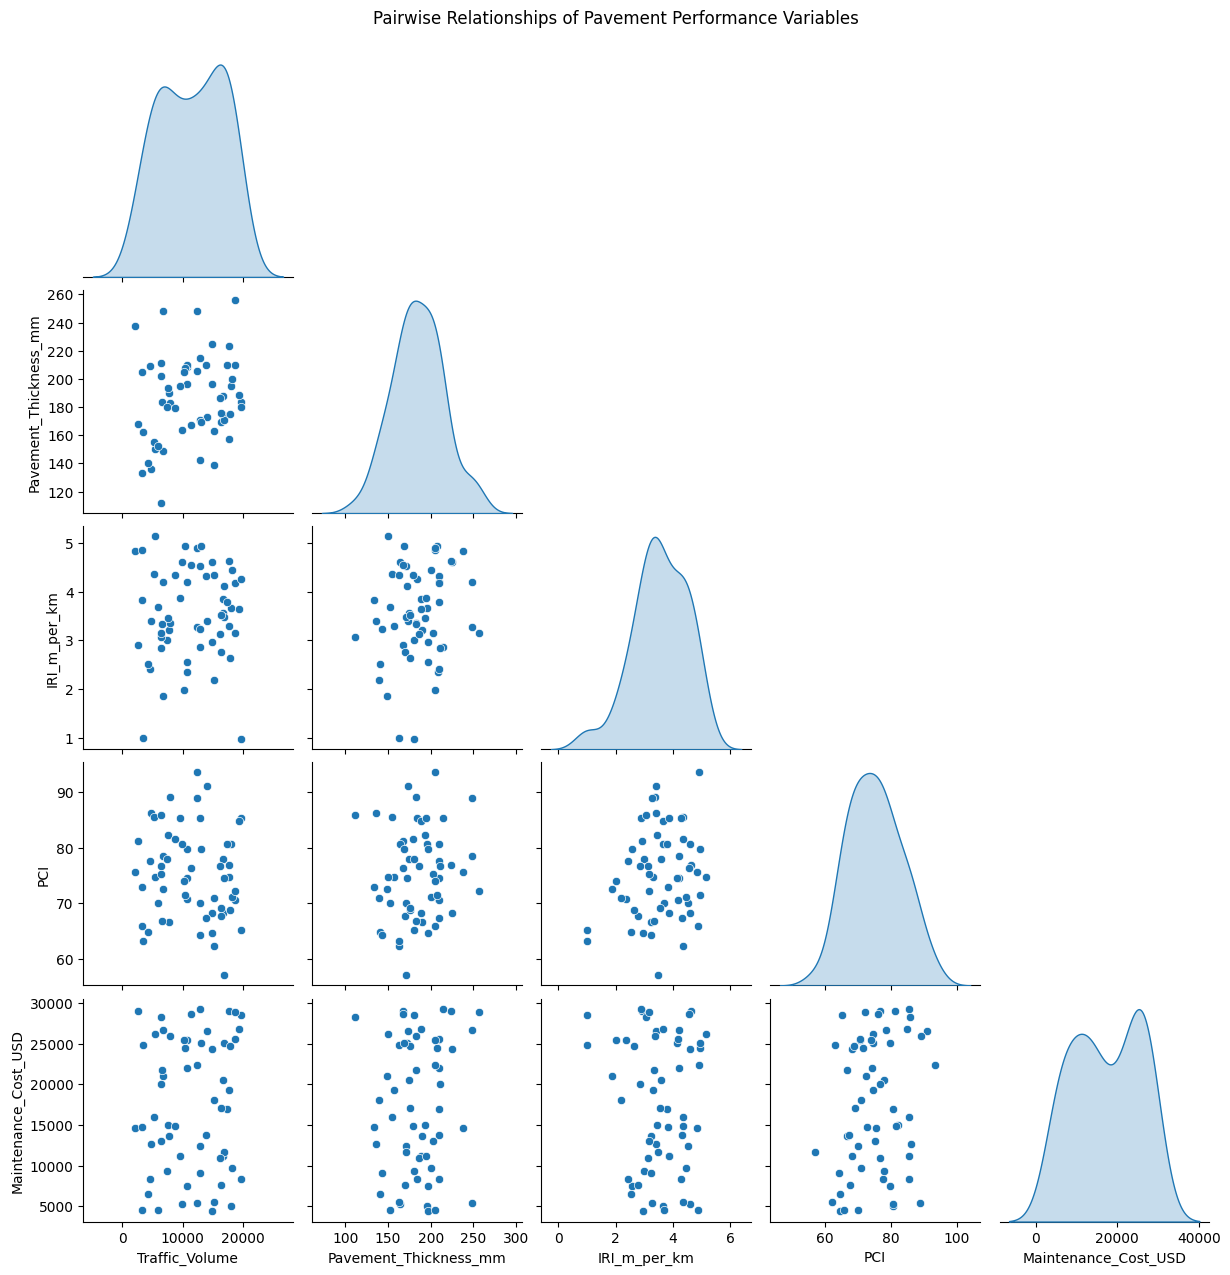

In [15]:
sns.pairplot(df[["Traffic_Volume", "Pavement_Thickness_mm", "IRI_m_per_km", "PCI", "Maintenance_Cost_USD"]], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships of Pavement Performance Variables", y=1.02)
plt.show()


Answer Interpretation:

Diagonal histograms show distribution.

Off-diagonal scatter plots reveal correlations:

IRI ↑ → PCI ↓ (negative)

Traffic ↑ → IRI ↑ (positive)

Maintenance cost ↑ as PCI ↓ (expected).

🧩 8. Box Plot and Violin Plot — Surface Type vs IRI

Question:
Compare the variability and distribution of IRI for each surface type.

/tmp/ipython-input-362673045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Surface_Type', y='IRI_m_per_km', data=df, palette='Set2')


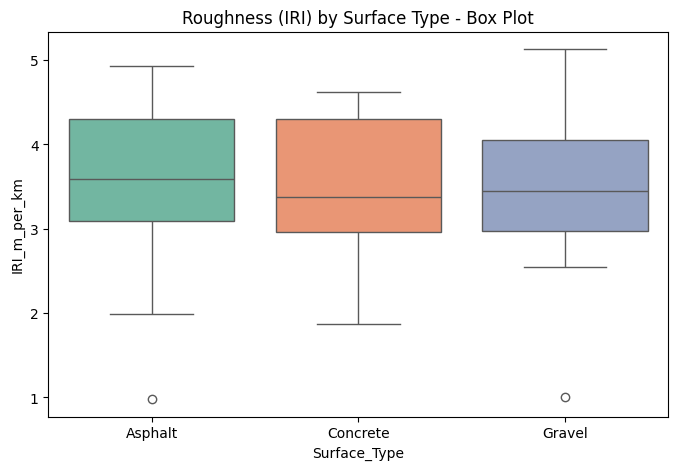

/tmp/ipython-input-362673045.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Surface_Type', y='IRI_m_per_km', data=df, palette='Set3')


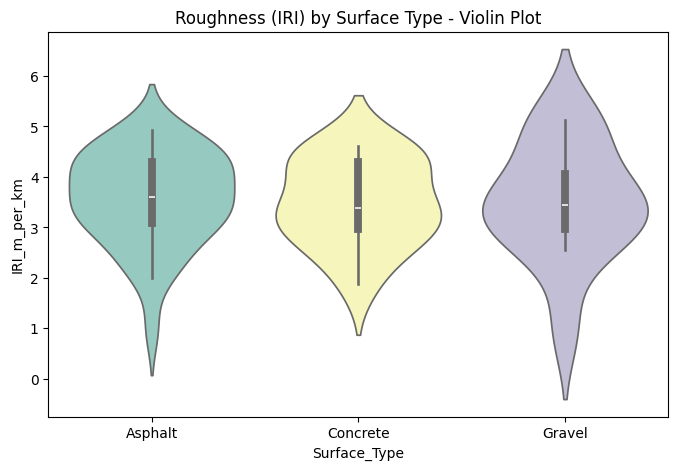

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Surface_Type', y='IRI_m_per_km', data=df, palette='Set2')
plt.title("Roughness (IRI) by Surface Type - Box Plot")
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(x='Surface_Type', y='IRI_m_per_km', data=df, palette='Set3')
plt.title("Roughness (IRI) by Surface Type - Violin Plot")
plt.show()


Answer Interpretation:

Boxplot highlights outliers and median values.

Violin plot shows full density.

Asphalt may have wider spread (aging effect), while concrete is more consistent.

🧩 9. QQ and PP Plots — Normality Check of PCI

Question:
Evaluate whether the pavement condition index (PCI) follows a normal distribution.

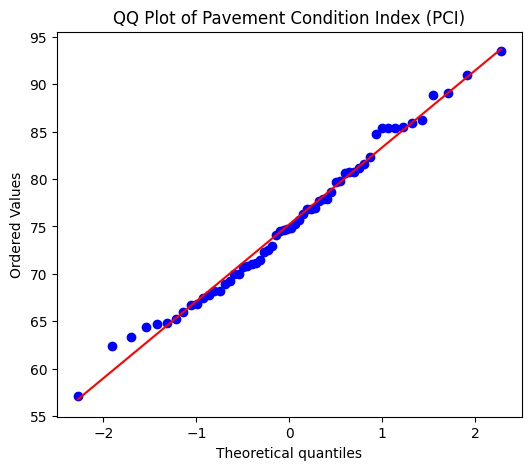

<Figure size 600x500 with 0 Axes>

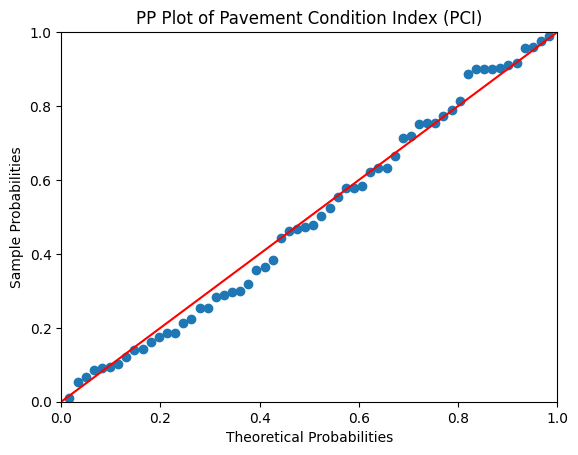

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
stats.probplot(df['PCI'], dist="norm", plot=plt)
plt.title("QQ Plot of Pavement Condition Index (PCI)")
plt.show()

# PP Plot
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm

plt.figure(figsize=(6,5))
ProbPlot(df['PCI'], fit=True).ppplot(line='45')
plt.title("PP Plot of Pavement Condition Index (PCI)")
plt.show()


Answer Interpretation:

If points lie along the 45° line, PCI data ≈ normal.

Deviations in tails → presence of extreme good or bad pavements (non-normal).